## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('raw.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group D,master's degree,standard,none,70,75
1,female,group C,bachelor's degree,free/reduced,completed,83,83
2,female,group D,some college,free/reduced,none,89,86
3,male,group C,master's degree,free/reduced,none,67,66
4,male,group E,high school,standard,none,64,57


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
y = df['math_score']

In [9]:
y

0       62
1       66
2       79
3       61
4       73
        ..
996     62
997     74
998     65
999     61
1000    61
Name: math_score, Length: 1001, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1001, 19)

In [13]:
X.shape

(1001, 19)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (201, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2523
- Mean Absolute Error: 4.1648
- R2 Score: 0.8817
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6387
- Mean Absolute Error: 4.5520
- R2 Score: 0.8522


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5103
- Mean Absolute Error: 5.1631
- R2 Score: 0.8182
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4568
- Mean Absolute Error: 4.9964
- R2 Score: 0.8061


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2519
- Mean Absolute Error: 4.1637
- R2 Score: 0.8817
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6377
- Mean Absolute Error: 4.5524
- R2 Score: 0.8522


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7591
- Mean Absolute Error: 4.6178
- R2 Score: 0.8577
-----------------------

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2822
- Mean Absolute Error: 1.7951
- R2 Score: 0.9777
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2931
- Mean Absolute Error: 4.9287
- R2 Score: 0.8158


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.8924
- Mean Absolute Error: 0.5710
- R2 Score: 0.9966
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7682
- Mean Absolute Error: 5.4438
- R2 Score: 0.7870


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0018
- Mean Absolute Error: 2.3311
- R2 Score: 0.9613
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3299
- Mean Absolute Error: 5.0958
- R2 Score: 0.8137


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8109
- Mean Absolute Error: 4.7674
- R2 Score: 0.85

### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852201
0,Linear Regression,0.852153
5,Random Forest Regressor,0.815840
7,CatBoosting Regressor,0.813683
1,Lasso,0.806139
8,AdaBoost Regressor,0.799997
6,XGBRegressor,0.786985
3,K-Neighbors Regressor,0.766010
4,Decision Tree,0.688606


## Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.22


## Plot y_pred and y_test

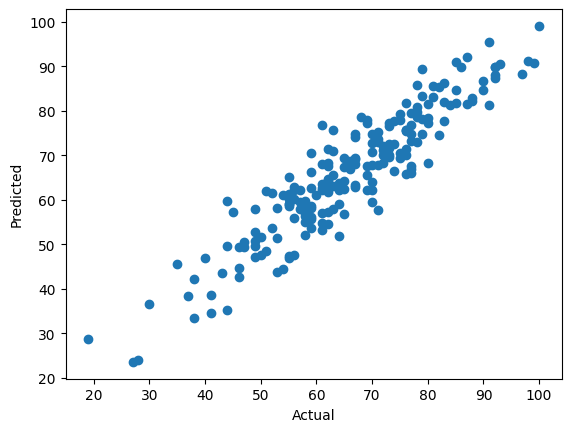

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

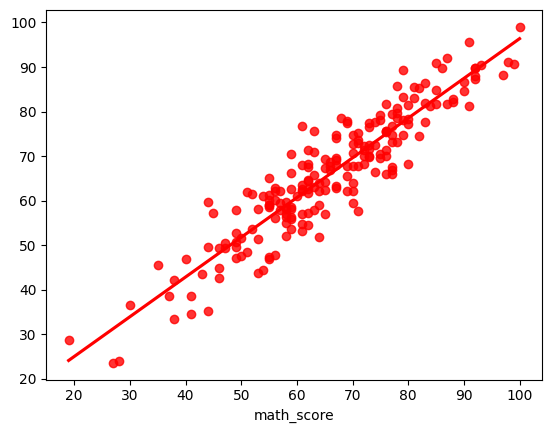

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,55,61.321289,-6.321289
941,58,59.625977,-1.625977
741,55,65.053711,-10.053711
980,54,60.993164,-6.993164
411,56,56.031250,-0.031250
...,...,...,...
332,58,52.115234,5.884766
208,77,73.159180,3.840820
992,77,67.613281,9.386719
78,49,49.572266,-0.572266
